### Supertrend

In [1]:
import pandas as pd
import numpy as np

# Creiamo una serie storica dei prezzi del Bitcoin
data = {
    'date': pd.date_range(start='1/1/2022', periods=10),
    'close': [45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000],
    'high': [45500, 46500, 47500, 48500, 49500, 50500, 51500, 52500, 53500, 54500],
    'low': [44500, 45500, 46500, 47500, 48500, 49500, 50500, 51500, 52500, 53500]
}
df = pd.DataFrame(data)

# Definiamo i parametri per l'indicatore Supertrend
period = 3
multiplier = 1.5

# Calcoliamo l'Average True Range (ATR)
hl = df['high'] - df['low']
hc = np.abs(df['high'] - df['close'].shift())
lc = np.abs(df['low'] - df['close'].shift())
df['tr'] = hl.where(hl>hc, hc).where(hl>lc, lc)
df['atr'] = df['tr'].rolling(period).mean()

# Calcoliamo l'indicatore Supertrend
df['upper_band'] = ((df['high'] + df['low']) / 2) + multiplier * df['atr']
df['lower_band'] = ((df['high'] + df['low']) / 2) - multiplier * df['atr']
df['in_uptrend'] = True

for current in range(1, len(df.index)):
    previous = current - 1
    
    if df['close'][current] > df['upper_band'][previous]:
        df['in_uptrend'][current] = True
    elif df['close'][current] < df['lower_band'][previous]:
        df['in_uptrend'][current] = False
    else:
        df['in_uptrend'][current] = df['in_uptrend'][previous]
        
        if df['in_uptrend'][current] and df['lower_band'][current] < df['lower_band'][previous]:
            df['lower_band'][current] = df['lower_band'][previous]
            
        if not df['in_uptrend'][current] and df['upper_band'][current] > df['upper_band'][previous]:
            df['upper_band'][current] = df['upper_band'][previous]

print(df)

c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


        date  close   high    low      tr     atr  upper_band  lower_band  \
0 2022-01-01  45000  45500  44500     NaN     NaN         NaN         NaN   
1 2022-01-02  46000  46500  45500  1500.0     NaN         NaN         NaN   
2 2022-01-03  47000  47500  46500  1500.0     NaN         NaN         NaN   
3 2022-01-04  48000  48500  47500  1500.0  1500.0     50250.0     45750.0   
4 2022-01-05  49000  49500  48500  1500.0  1500.0     51250.0     46750.0   
5 2022-01-06  50000  50500  49500  1500.0  1500.0     52250.0     47750.0   
6 2022-01-07  51000  51500  50500  1500.0  1500.0     53250.0     48750.0   
7 2022-01-08  52000  52500  51500  1500.0  1500.0     54250.0     49750.0   
8 2022-01-09  53000  53500  52500  1500.0  1500.0     55250.0     50750.0   
9 2022-01-10  54000  54500  53500  1500.0  1500.0     56250.0     51750.0   

   in_uptrend  
0        True  
1        True  
2        True  
3        True  
4        True  
5        True  
6        True  
7        True  
8       

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_68848\3996498651.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_uptrend'][current] = df['in_uptrend'][previous]


### Keltner Channels

In [2]:
import pandas as pd
import numpy as np

# Creiamo una serie storica dei prezzi del Bitcoin
data = {
    'date': pd.date_range(start='1/1/2022', periods=10),
    'close': [45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000],
    'high': [45500, 46500, 47500, 48500, 49500, 50500, 51500, 52500, 53500, 54500],
    'low': [44500, 45500, 46500, 47500, 48500, 49500, 50500, 51500, 52500, 53500]
}
df = pd.DataFrame(data)

# Definiamo i parametri per l'indicatore del Canale di Keltner
period = 3
multiplier = 1.5

# Calcoliamo l'Average True Range (ATR)
hl = df['high'] - df['low']
hc = np.abs(df['high'] - df['close'].shift())
lc = np.abs(df['low'] - df['close'].shift())
df['tr'] = hl.where(hl>hc, hc).where(hl>lc, lc)
df['atr'] = df['tr'].rolling(period).mean()

# Calcoliamo l'indicatore del Canale di Keltner
df['ema'] = df['close'].ewm(span=period).mean()
df['upper_band'] = df['ema'] + multiplier * df['atr']
df['lower_band'] = df['ema'] - multiplier * df['atr']

print(df)

        date  close   high    low      tr     atr           ema    upper_band  \
0 2022-01-01  45000  45500  44500     NaN     NaN  45000.000000           NaN   
1 2022-01-02  46000  46500  45500  1500.0     NaN  45666.666667           NaN   
2 2022-01-03  47000  47500  46500  1500.0     NaN  46428.571429           NaN   
3 2022-01-04  48000  48500  47500  1500.0  1500.0  47266.666667  49516.666667   
4 2022-01-05  49000  49500  48500  1500.0  1500.0  48161.290323  50411.290323   
5 2022-01-06  50000  50500  49500  1500.0  1500.0  49095.238095  51345.238095   
6 2022-01-07  51000  51500  50500  1500.0  1500.0  50055.118110  52305.118110   
7 2022-01-08  52000  52500  51500  1500.0  1500.0  51031.372549  53281.372549   
8 2022-01-09  53000  53500  52500  1500.0  1500.0  52017.612524  54267.612524   
9 2022-01-10  54000  54500  53500  1500.0  1500.0  53009.775171  55259.775171   

     lower_band  
0           NaN  
1           NaN  
2           NaN  
3  45016.666667  
4  45911.290323  


### Momentum

c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


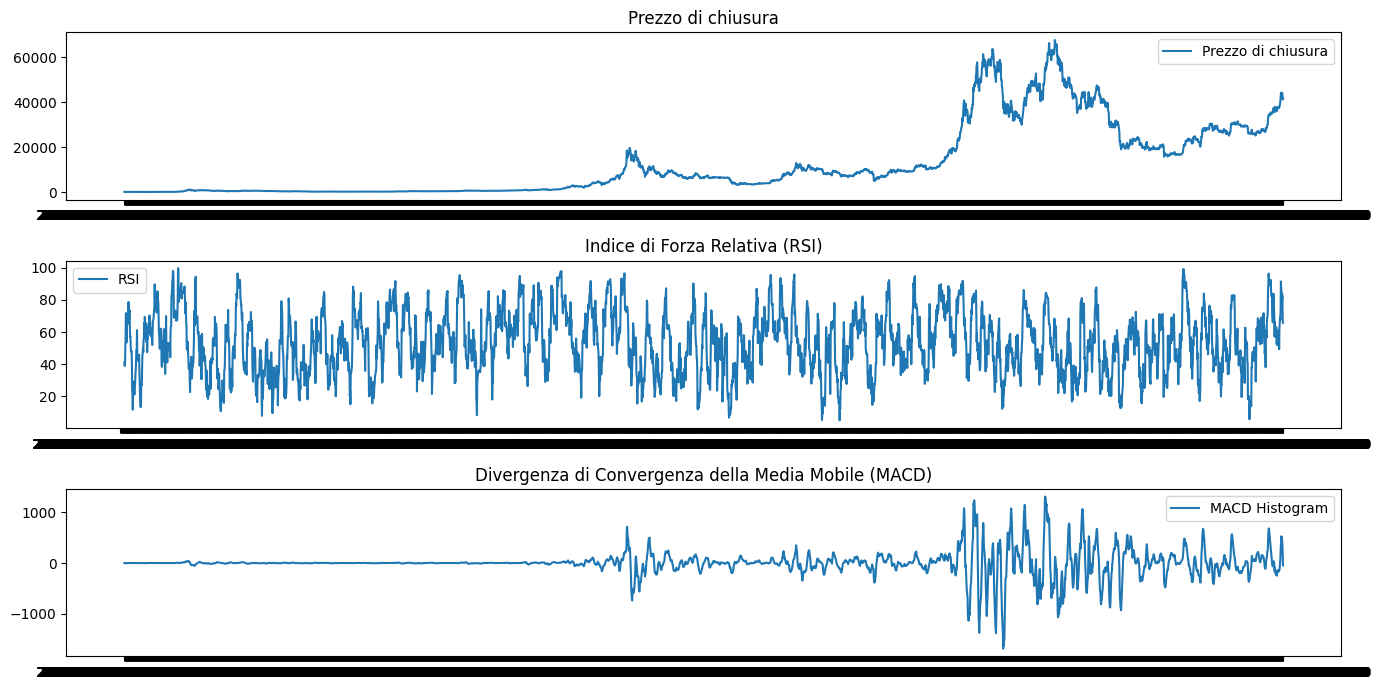

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creiamo una serie storica dei prezzi del Bitcoin
# data = {
#     'date': pd.date_range(start='1/1/2022', periods=100),
#     'close': np.random.randint(45000, 55000, 100),
# }
# df = pd.DataFrame(data)
# df.set_index('date', inplace=True)

data = pd.read_csv('bitcoin_data.csv')
df = pd.DataFrame(data)
df.set_index('Timestamp', inplace=True)

# Calcoliamo l'RSI
delta = df['Price'].diff()
gain = (delta > 0) * delta
loss = (delta < 0) * -delta
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Calcoliamo il MACD
exp12     = df['Price'].ewm(span=12, adjust=False).mean()
exp26     = df['Price'].ewm(span=26, adjust=False).mean()
macd_line = exp12 - exp26
signal_line = macd_line.ewm(span=9, adjust=False).mean()
df['MACD_Histogram'] = macd_line - signal_line


# Creiamo i grafici
plt.figure(figsize=(14,7))

# Grafico del prezzo di chiusura
plt.subplot(311)
plt.plot(df['Price'], label='Prezzo di chiusura')
plt.title('Prezzo di chiusura')
plt.legend()

# Grafico dell'RSI
plt.subplot(312)
plt.plot(df['RSI'], label='RSI')
plt.title('Indice di Forza Relativa (RSI)')
plt.legend()

# Grafico del MACD
plt.subplot(313)
plt.plot(df['MACD_Histogram'], label='MACD Histogram')
plt.title('Divergenza di Convergenza della Media Mobile (MACD)')
plt.legend()

plt.tight_layout()
plt.show()


### Bollinger Bands

c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


                                Price           SMA       stddev  \
Timestamp                                                          
2013-04-28 00:00:00.000    135.300000           NaN          NaN   
2013-04-29 00:00:00.000    141.960000           NaN          NaN   
2013-04-30 00:00:00.000    135.300000           NaN          NaN   
2013-05-01 00:00:00.000    117.000000           NaN          NaN   
2013-05-02 00:00:00.000    103.430000           NaN          NaN   
...                               ...           ...          ...   
2023-12-09 00:00:00.000  44202.176109  39235.652837  2669.624111   
2023-12-10 00:00:00.000  43745.491992  39552.227706  2813.751781   
2023-12-11 00:00:00.000  43757.959938  39865.660779  2919.034477   
2023-12-12 00:00:00.000  41200.962726  40127.440898  2782.412761   
2023-12-13 00:00:00.000  41450.819387  40326.740220  2723.794177   

                           Upper Band    Lower Band  
Timestamp                                            
2013-04

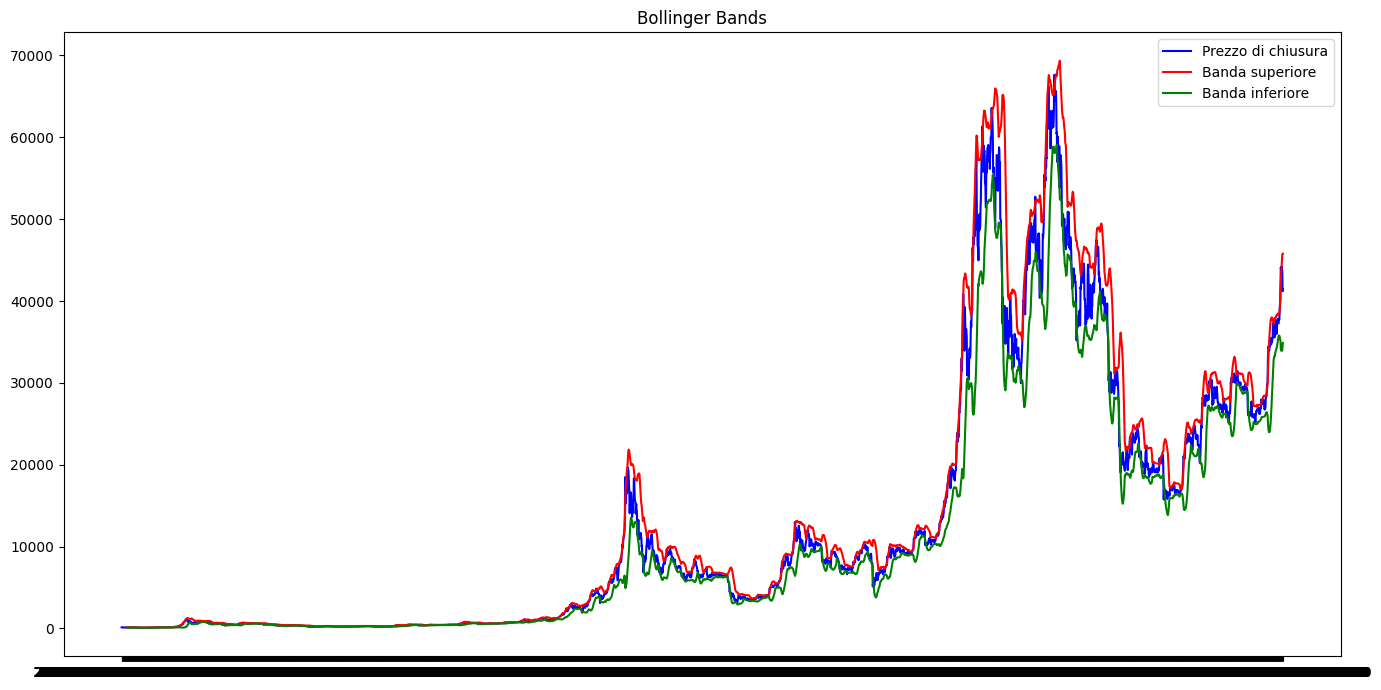

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Creiamo una serie storica dei prezzi del Bitcoin
# data = {
#     'Timestamp': pd.date_range(start='1/1/2022', periods=100),
#     'Price': np.random.randint(45000, 55000, 100),
# }

data = pd.read_csv('bitcoin_data.csv')

df = pd.DataFrame(data)
df.set_index('Timestamp', inplace=True)


# Calcoliamo la media mobile semplice (SMA)
window = 20
df['SMA'] = df['Price'].rolling(window=window).mean()

# Calcoliamo la deviazione standard
df['stddev'] = df['Price'].rolling(window=window).std()

moltiplicatore = 2
# Calcoliamo le Bollinger Bands
df['Upper Band'] = df['SMA'] + (moltiplicatore * df['stddev'])
df['Lower Band'] = df['SMA'] - (moltiplicatore * df['stddev'])

print(df)


# Creiamo il grafico
plt.figure(figsize=(14,7))

# Grafico del prezzo di chiusura
plt.plot(df['Price'], label='Prezzo di chiusura', color='blue')

# Grafico delle Bollinger Bands
plt.plot(df['Upper Band'], label='Banda superiore', color='red')
plt.plot(df['Lower Band'], label='Banda inferiore', color='green')

plt.title('Bollinger Bands')
plt.legend()

plt.tight_layout()
plt.show()

#### RSI (anche se non è su YP)

Timestamp
2013-04-28 00:00:00.000          NaN
2013-04-29 00:00:00.000          NaN
2013-04-30 00:00:00.000          NaN
2013-05-01 00:00:00.000          NaN
2013-05-02 00:00:00.000          NaN
                             ...    
2023-12-09 00:00:00.000    84.192290
2023-12-10 00:00:00.000    80.169716
2023-12-11 00:00:00.000    82.870476
2023-12-12 00:00:00.000    66.674430
2023-12-13 00:00:00.000    65.802049
Name: Price, Length: 3880, dtype: float64


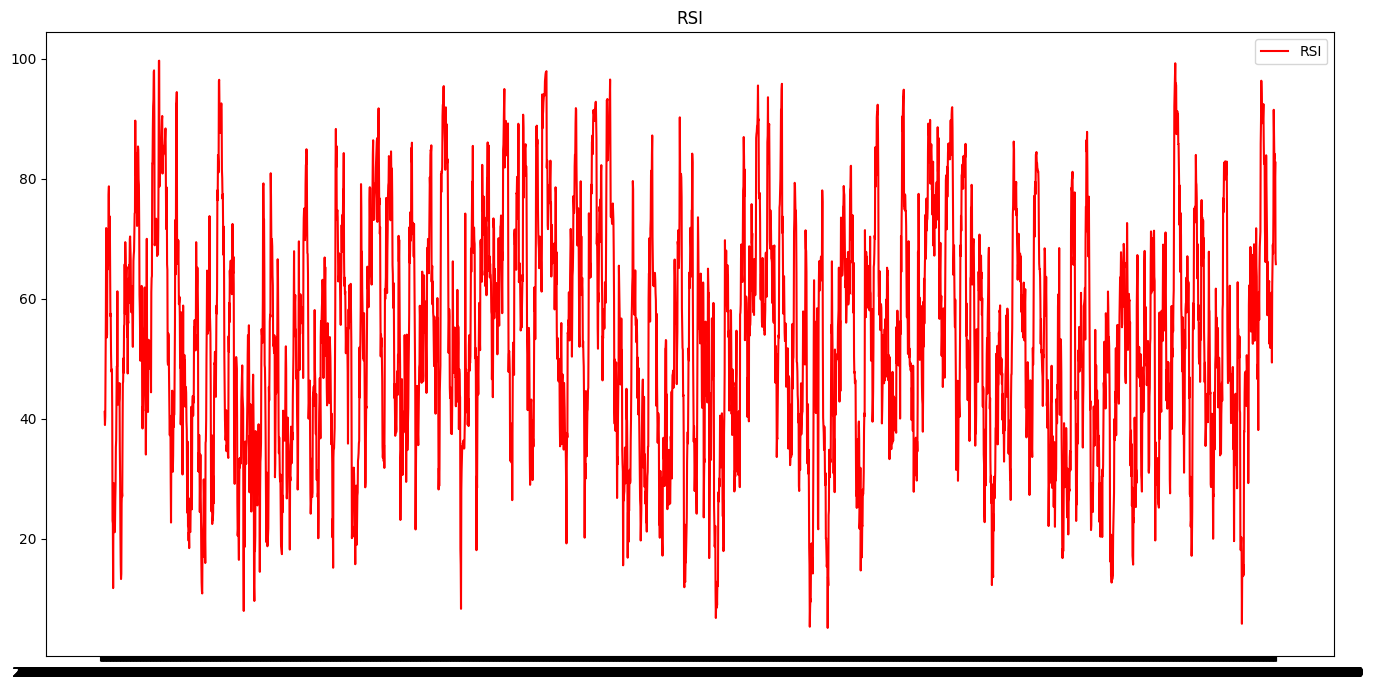

In [2]:
import pandas as pd
import numpy as np

def calculate_rsi(data, window_length=14):
    delta = data.diff()
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0

    average_gain = up.rolling(window_length).mean()
    average_loss = abs(down.rolling(window_length).mean())

    rs = average_gain / average_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Esempio di utilizzo della funzione su dati fittizi
# data = pd.Series(np.random.randn(1000), index=pd.date_range(start='1/1/2020', periods=1000))
data = pd.read_csv('bitcoin_data.csv')
df = pd.DataFrame(data)
df.set_index('Timestamp', inplace=True)

rsi = calculate_rsi(df['Price'])
print(rsi)

# Creiamo il grafico
plt.figure(figsize=(14,7))

# Grafico dell'RSI
plt.plot(rsi, label='RSI', color='red')

plt.title('RSI')
plt.legend()

plt.tight_layout()
plt.show()

# Confronto delle strategie

In [ ]:
def calculate_supertrend(df, period, multiplier):
    """Calcola l'indicatore Supertrend per un DataFrame di prezzi."""
    
    # Calcola l'Average True Range (ATR)
    hl = df['high'] - df['low']
    hc = np.abs(df['high'] - df['close'].shift())
    lc = np.abs(df['low'] - df['close'].shift())
    df['tr'] = hl.where(hl>hc, hc).where(hl>lc, lc)
    df['atr'] = df['tr'].rolling(period).mean()

    # Calcola l'indicatore Supertrend
    df['upper_band'] = ((df['high'] + df['low']) / 2) + multiplier * df['atr']
    df['lower_band'] = ((df['high'] + df['low']) / 2) - multiplier * df['atr']
    df['in_uptrend'] = True

    for current in range(1, len(df.index)):
        previous = current - 1
        
        if df['close'][current] > df['upper_band'][previous]:
            df['in_uptrend'][current] = True
        elif df['close'][current] < df['lower_band'][previous]:
            df['in_uptrend'][current] = False
        else:
            df['in_uptrend'][current] = df['in_uptrend'][previous]
            
            if df['in_uptrend'][current] and df['lower_band'][current] < df['lower_band'][previous]:
                df['lower_band'][current] = df['lower_band'][previous]
                
            if not df['in_uptrend'][current] and df['upper_band'][current] > df['upper_band'][previous]:
                df['upper_band'][current] = df['upper_band'][previous]

    return df

In [ ]:
def calculate_keltner_channel(df, period, multiplier):
    """Calcola l'indicatore del Canale di Keltner per un DataFrame di prezzi."""
    
    # Calcola l'Average True Range (ATR)
    hl = df['high'] - df['low']
    hc = np.abs(df['high'] - df['close'].shift())
    lc = np.abs(df['low'] - df['close'].shift())
    df['tr'] = hl.where(hl>hc, hc).where(hl>lc, lc)
    df['atr'] = df['tr'].rolling(period).mean()

    # Calcola l'indicatore del Canale di Keltner
    df['ema'] = df['close'].ewm(span=period).mean()
    df['upper_band'] = df['ema'] + multiplier * df['atr']
    df['lower_band'] = df['ema'] - multiplier * df['atr']

    return df

In [ ]:
def calculate_momentum(df):
    """Calcola l'RSI e il MACD per un DataFrame di prezzi."""
    
    # Calcoliamo l'RSI
    delta = df['close'].diff()
    gain = (delta > 0) * delta
    loss = (delta < 0) * -delta
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # Calcoliamo il MACD
    exp12     = df['close'].ewm(span=12, adjust=False).mean()
    exp26     = df['close'].ewm(span=26, adjust=False).mean()
    macd_line = exp12 - exp26
    signal_line = macd_line.ewm(span=9, adjust=False).mean()
    df['MACD_Histogram'] = macd_line - signal_line

    return df

In [ ]:
def calculate_bollinger_bands(df, window=20, num_std=2):
    """Calcola le Bollinger Bands per un DataFrame di prezzi."""
    
    # Calcola la media mobile semplice (SMA)
    df['SMA'] = df['close'].rolling(window=window).mean()

    # Calcola la deviazione standard
    df['stddev'] = df['close'].rolling(window=window).std()

    # Calcola le Bollinger Bands
    df['Upper Band'] = df['SMA'] + (num_std * df['stddev'])
    df['Lower Band'] = df['SMA'] - (num_std * df['stddev'])

    return df

In [ ]:
def calculate_profit(df):
    """Calcola il profitto per un DataFrame di prezzi."""
    
    # Inizializza il capitale e la posizione
    capital = 0
    position = 0

    # Itera attraverso il DataFrame
    for i in range(len(df)):
        
        # Se la colonna 'Buy' è True, acquista l'asset
        if df['Buy'].iloc[i]:
            capital -= df['close'].iloc[i]
            position += 1
        
        # Se la colonna 'Sell' è True e abbiamo una posizione, vendi l'asset
        elif df['Sell'].iloc[i] and position > 0:
            capital += position * df['close'].iloc[i]
            position = 0

    # Vendi qualsiasi posizione rimanente alla fine
    if position > 0:
        capital += position * df['close'].iloc[-1]

    return capital

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import ParameterGrid

# Carica i dati storici dei prezzi di Bitcoin
df = pd.read_csv('bitcoin_data.csv')
df.set_index('Timestamp', inplace=True)

# Definisci i parametri per la grid search
param_grid = {'window': [10, 20, 30], 'multiplier': [1.5, 2, 2.5]}

# Inizializza un dizionario per memorizzare i risultati
results = {}

# Esegui la grid search per ogni strategia
for strategy in ['Supertrend', 'Keltner Channel', 'Momentum', 'Bollinger Bands']:
    best_profit = 0
    best_params = None
    
    for params in ParameterGrid(param_grid):
        # Calcola gli indicatori per la strategia corrente
        if strategy == 'Supertrend':
            df = calculate_supertrend(df, params['window'], params['multiplier'])
        elif strategy == 'Keltner Channel':
            df = calculate_keltner_channel(df, params['window'], params['multiplier'])
        elif strategy == 'Momentum':
            df = calculate_momentum(df, params['window'], params['multiplier'])
        elif strategy == 'Bollinger Bands':
            df = calculate_bollinger_bands(df, params['window'], params['multiplier'])
        
        # Calcola il profitto per la strategia corrente
        profit = calculate_profit(df)
        
        # Aggiorna i migliori parametri e il miglior profitto
        if profit > best_profit:
            best_profit = profit
            best_params = params
    
    # Memorizza i migliori parametri e il miglior profitto per la strategia corrente
    results[strategy] = {'best_params': best_params, 'best_profit': best_profit}

# Stampa i risultati
for strategy, result in results.items():
    print(f"Strategia: {strategy}, Migliori parametri: {result['best_params']}, Miglior profitto: {result['best_profit']}")